- competition/dataset : [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic)
- date : 2021/01/20
- original : [https://www.kaggle.com/ash316/eda-to-prediction-dietanic](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)

## EDA To Prediction (DieTanic)

**✏ 필사 1회** 

> _인생은 때때로 항상 원했던 것을 최악의 시기에 주는 잔인한 유머 감각을 가지고 있다.  
ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ\- Lisa Kleypas_

타이타닉의 침몰은 역사상 가장 악명 높은 난파 중 하나입니다. 1912년 4월 15일 첫 항해에서 빙산에 충돌해 가라앉았고, 2224명의 승객과 선원들 중 1502명이 사망했습니다. 그래서 **DieTanic**이라는 이름이 붙었습니다. 이것은 전 세계의 그 누구도 잊을 수 없는 재앙입니다.  

타이타닉 데이터 셋은 입문자들이 데이터 사이언스에서 여정을 시작하고 캐글 대회에 참가하기에 매우 좋습니다.  

이 노트북의 목표는 feature 확인, feature 추가, 머신러닝 개념 등 **예측 모델링 문제의 워크플로우가 어떤지 아이디어를 제공**하는 것입니다. 초심자 누구나 이해할 수 있도록 최대한 기본적인 내용으로 담기 위해 노력했습니다.  

### 목차
**Part 1. EDA**  
1-1. feature 분석  
1-2. feature 간 상관 분석  

**Part 2. feature engineering과 data clensing데이터 정제**  
2-1. 새로운 feature 추가  
2-2. 불필요한 feature 제거  
2-3. 모델링을 위한 feature 수정  

**Part 3. 예측 모델링**  
3-1. 기본적인 알고리즘  
3-2. 교차 검증  
3-3. 앙상블  
3-4. 중요 feature 추출

### Part 1. Explaratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('../data/titanic_train.csv')

In [3]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# null 데이터 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age**, **Cabin**, **Embarked**에는 null 데이터가 존재합니다. 뒤에서 다룰 예정입니다.

#### 얼마나 많이 생존했을까?

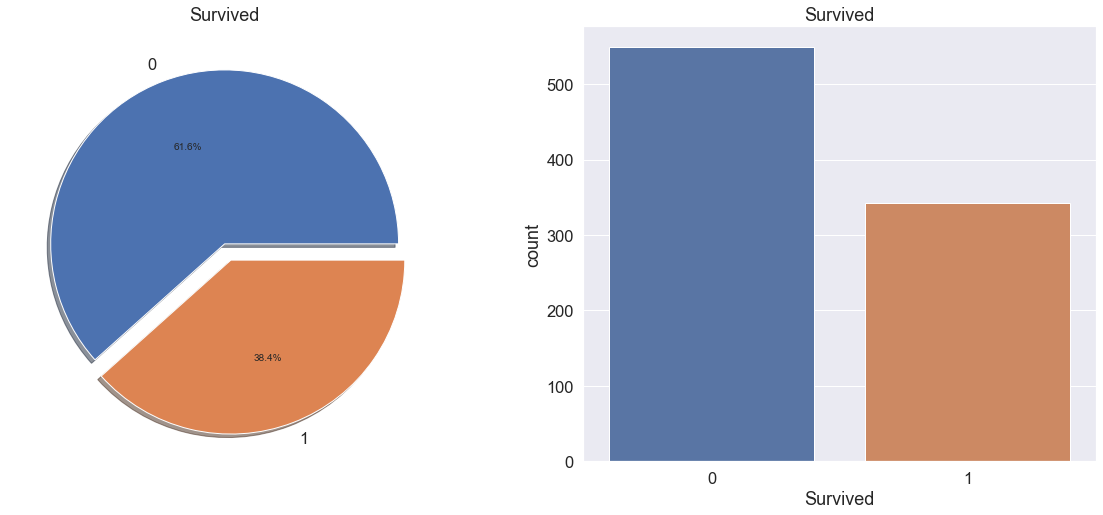

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

891명의 탑승객들 중 **38.4%**인 약 350명만이 살아남았습니다. 좀더 자세히 살펴보면서 insight를 얻고 어떤 범주의 승객들이 살아남았는지 알아봐야 합니다.  

성별, 탑승 항구, 나이 등 다양한 feature들로 생존률에 대해 더 알아봅시다.  

먼저, feature들이 타입을 확인해보겠습니다.

#### Feature 타입  
**범주형: Sex, Embarked**  
범주형 변수는 둘 이상의 범주를 가지며, 각 데이터들이 해당 범주에 포함됩니다. 예를 들어, 성별은 두 개의 범주(남성, 여성)를 가진 범주형 변수입니다. 정렬 및 순서 지정이 불가능합니다.  

**순서형: Pclass**  
순서형 변수는 범주형과 유사하지만 각 데이터에 대한 순서 지정이나 정렬이 가능합니다. 예를 들어, 높이를 Tall, Medium, Short로 나눈다면 순서형 변수가 되며, 상대적인 정렬이 가능합니다.  

**연속형: Age**  
두 점 사이, 혹은 최솟값과 최댓값 사이에서 값을 취할 수 있는 경우 연속형 변수라고 합니다.

#### 1-1. feature 분석

##### Sex (범주형 변수)

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

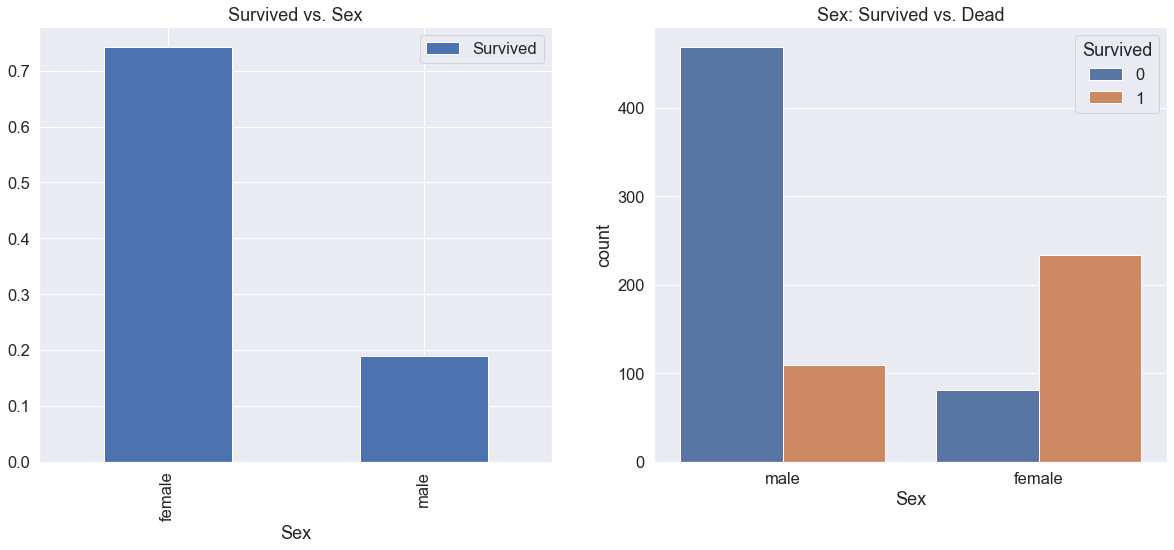

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')
plt.show()

남성의 수가 여성에 비해 훨씬 많음에도 불구하고 생존한 여성의 수는 생존한 남성의 두 배에 가깝습니다. 생존률은 **남성은 약 18-19%인데 반해, 여성 약 75%**입니다.  

모델링에 매우 중요한 feature인 것으로 보입니다.

##### Pclass (순서형 변수)

In [8]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


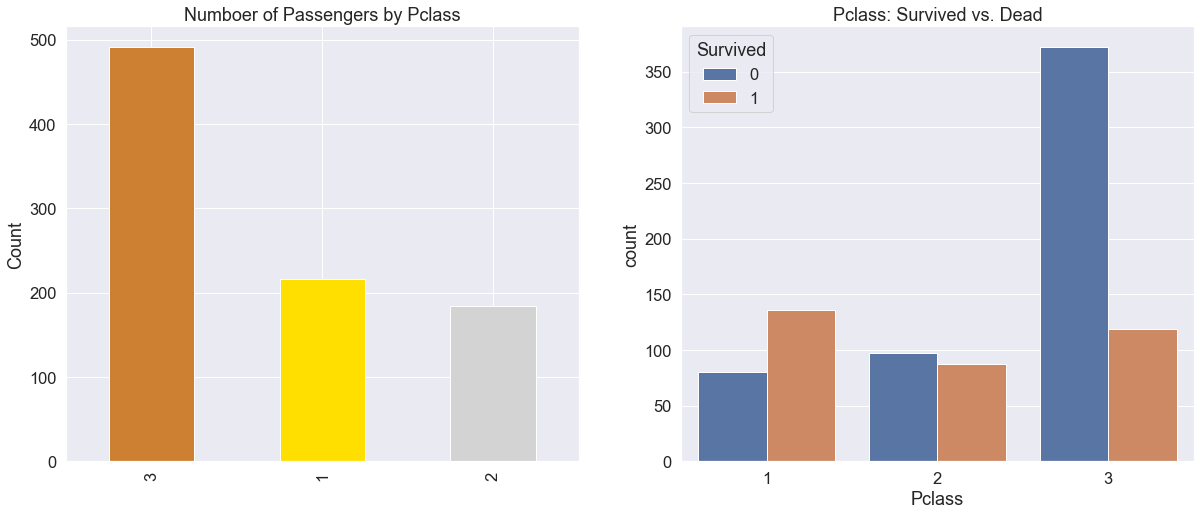

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Numboer of Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead')
plt.show()

1등석의 승객들이 구조에 가장 우선순위였음을 볼 수 있습니다. 탑승객 수는 3등석이 가장 많지만 생존률 가장 낮습니다.

생존률을 살펴보면, 1등석 **63%**, 2등석 **24%**, 3등석 **25%**입니다.  

이번에는 Sex, Pclass를 함께 고려하여 생존률을 확인해봅시다.

In [10]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

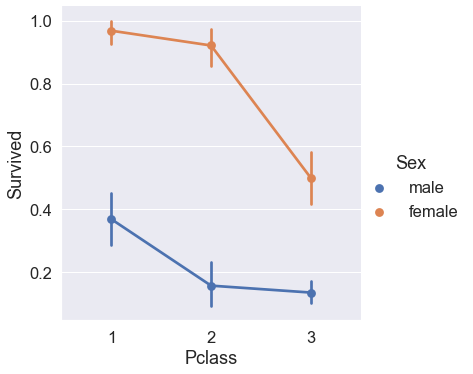

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

**factor plot**은 범주형 값의 분리를 쉽게 만들어줍니다.  

cross table과 factor plot을 보면, 1등석 여성들은 94명 중 3명만이 사망했기 때문에 생존률은 95-96%라고 쉽게 알 수 있습니다.  

Pclass와는 무관하게 구조 시 여성에게 우선 순위가 있었음은 분명합니다. 심지어 1등석의 남성들도 생존률은 매우 낮습니다.  

Pclass도 중요한 변수인 것으로 보입니다.

##### Age (연속형 변수)

In [12]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


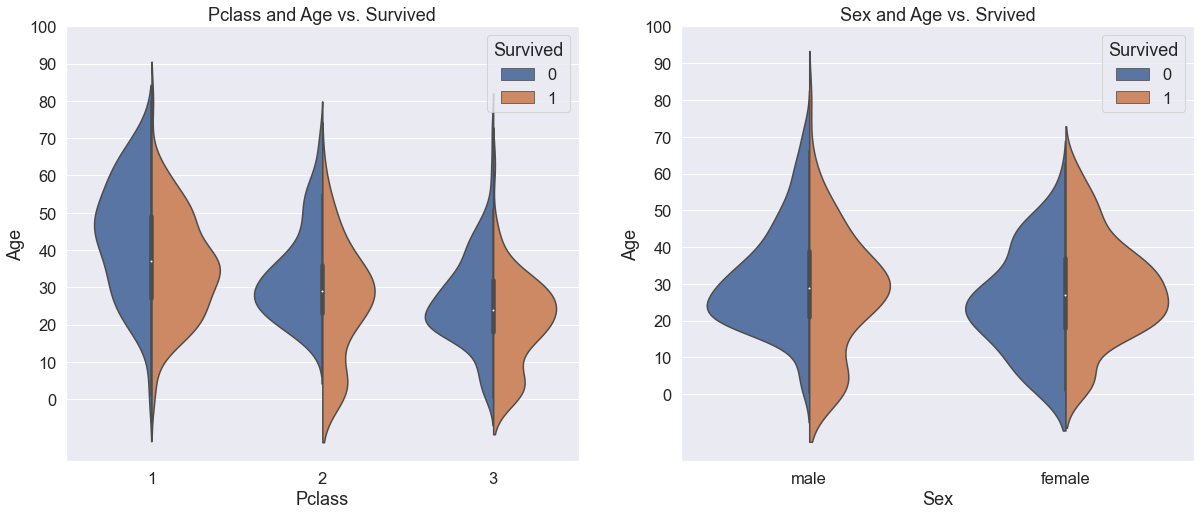

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Srvived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

1. Pclass에 따라 아이들이 증가하고, 10세 이하의 경우 Pclass와 관계 없이 생존률이 양호한 것으로 보입니다.  
2. 1등석에서 20-50대의 생존률이 높으며, 여성의 경우 훨씬 더 높습니다.  
3. 남성의 경우, 나이가 많을수록 생존률이 감소합니다.  

앞에서 본 것 처럼, Age feature에는 177개의 null값이 존재합니다. null값을 처리하기 위해, 평균값을 줄 수 있습니다. 그러나 다양한 나이에 다양한 사람들이 있다는 것이 문제입니다. 4세 아이에게 평균값인 29세를 입력할 수는 없습니다. 

이 부분을 해결하기 위해 **Name** feature를 확인해볼 수 있습니다. 이름에는 Mr, Mrs와 같은 호칭이 있기 때문에, 호칭별 평균값을 각 그룹에 할당할 수 있습니다.

**Initial (범주형 변수) 생성**

In [14]:
data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Initial에 잘못된 표기들이 있습니다. Mlle, Mme의 경우 Miss로, 다른 것들도 맞는 표기로 바꿔봅시다.

In [16]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

**Age의 결측값 처리**

In [18]:
data.loc[(data['Age'].isnull())&(data['Initial']=='Mr'), 'Age'] = 33
data.loc[(data['Age'].isnull())&(data['Initial']=='Mrs'), 'Age'] = 36
data.loc[(data['Age'].isnull())&(data['Initial']=='Master'), 'Age'] = 5
data.loc[(data['Age'].isnull())&(data['Initial']=='Miss'), 'Age'] = 22
data.loc[(data['Age'].isnull())&(data['Initial']=='Other'), 'Age'] = 46

In [19]:
# null값 남았는지 확인
data['Age'].isnull().any()

False

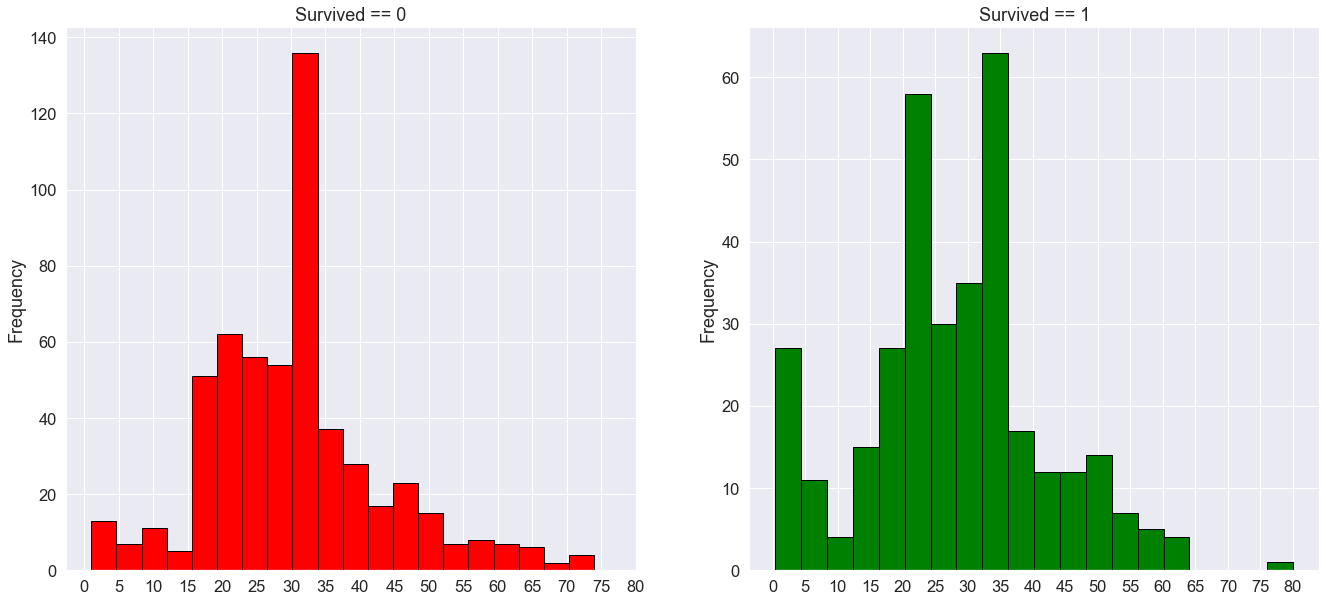

In [20]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data.loc[data['Survived']==0, 'Age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived == 0')
ax[0].set_xticks(range(0, 85, 5))

data.loc[data['Survived']==1, 'Age'].plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived == 1')
ax[1].set_xticks(range(0, 85, 5))
plt.show()

1. 5세 이하 유아들의 경우 대부분 구조되었습니다.  
2. 가장 나이 많은 승객(80세)도 구조되었습니다.  
3. 사망자가 가장 많은 그룹은 30-40세입니다.  

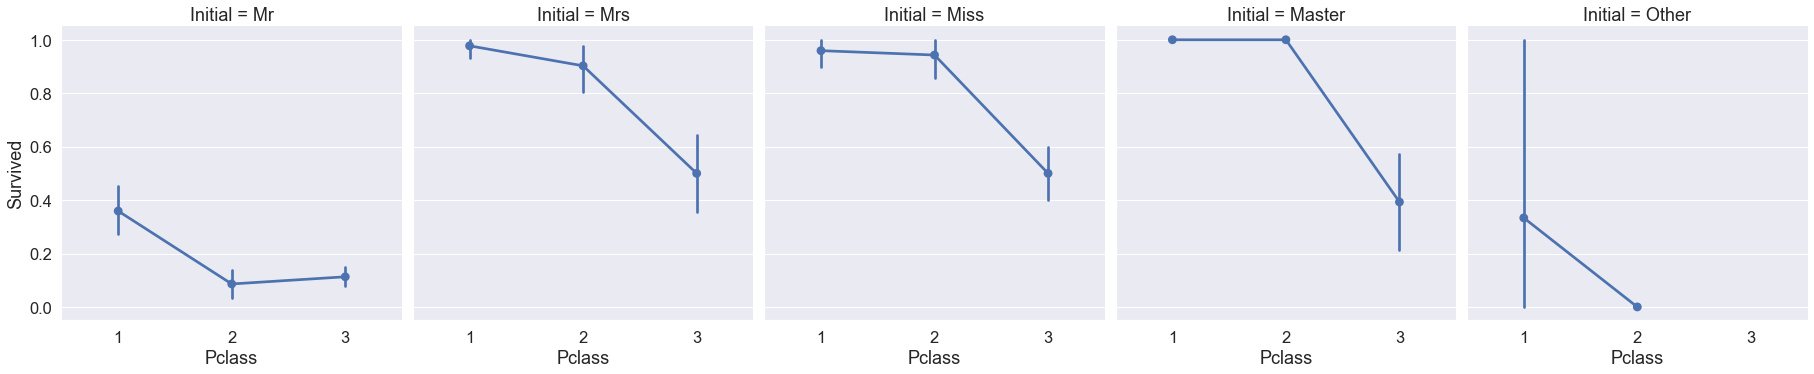

In [21]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

Pclass에 관계없이 여성과 아이들이 우선적으로 구조된 것을 확인할 수 있습니다.

##### Embarked (범주형 변수)

In [22]:
pd.crosstab([data['Embarked'], data['Pclass']], [data['Sex'], data['Survived']], margins=True).style.background_gradient(cmap='summer_r')

**탑승 항구에 따른 생존 가능성**

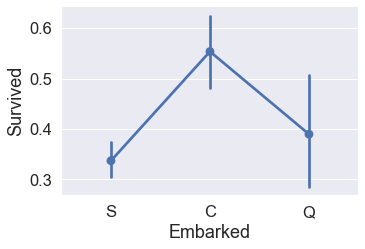

In [23]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

C 항구의 생존 가능성은 약 0.55로 가장 높고, S가 가장 낮습니다.

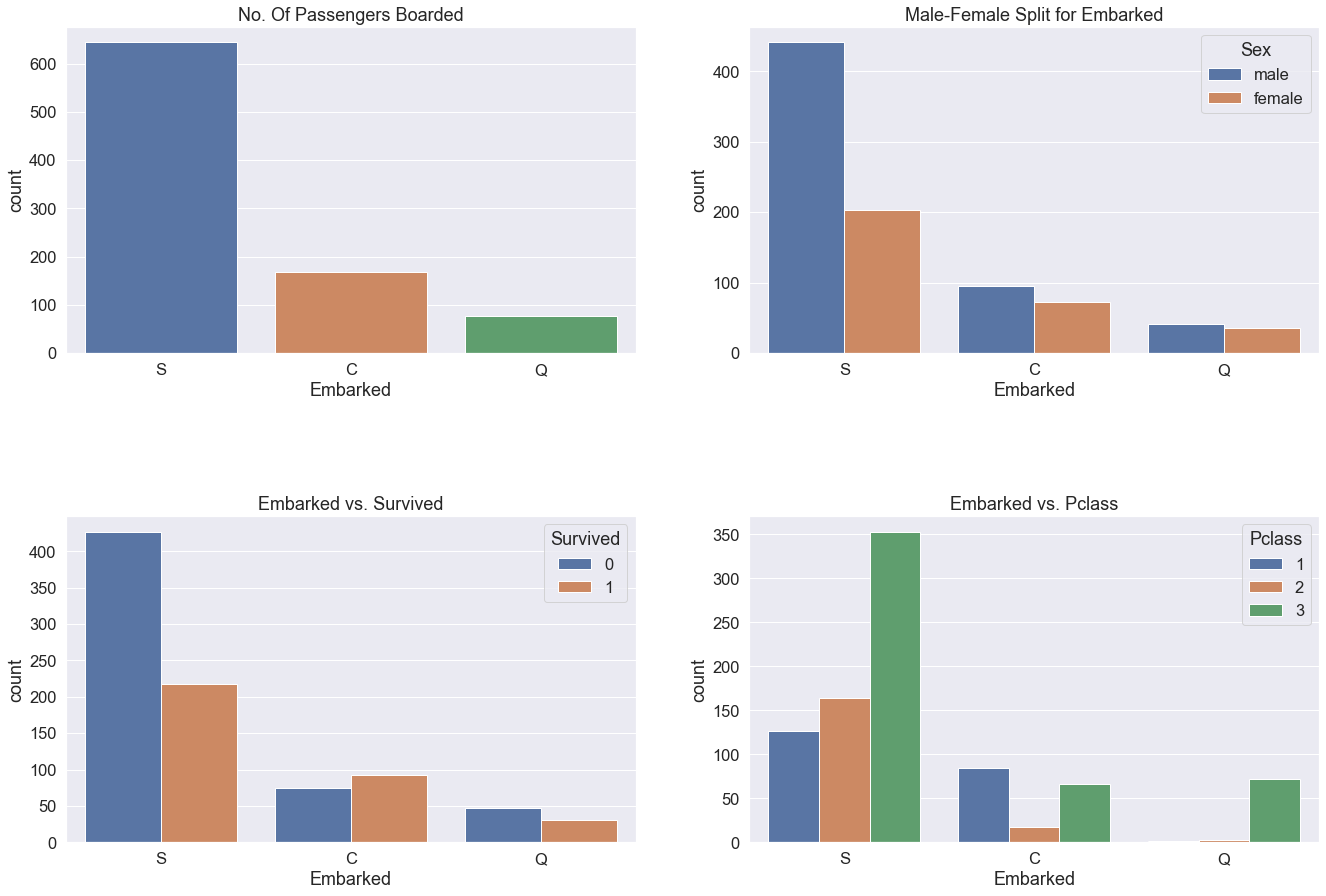

In [24]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs. Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1. S 항구가 탑승객이 가장 많으며, 대부분이 3등석 승객입니다.  
2. C 항구의 탑승객들의 상당수가 생존했고, 이는 아마도 1등석과 2등석 승객들의 구조때문인 것으로 예상됩니다.  
3. 부유한 사람들이 주로 S 항구를 이용한 것으로 보입니다. 그러나 생존률은 낮은데, 이는 약 81%의 3등석 승객들이 살아남지 못했기 때문입니다.

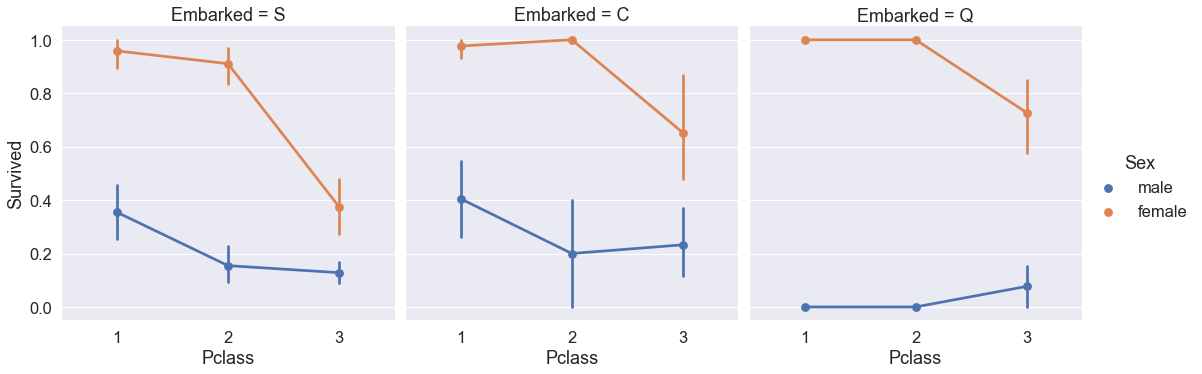

In [25]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

1. Pclass와는 무관하게 1등석과 2등석 여성들의 생존 가능성은 거의 1입니다.  
2. S 항구는 남녀 모두 생존률이 매우 낮기 때문에 3등석 승객들에게 매우 불행해보입니다.  
3. 항구 Q는 남성들은 거의 대부분 3등석으로, 가장 불행해보입니다.

**Embarked의 결측값 처리**  
가장 많은 승객이 S 항구에서 탑승했으므로 결측값을 S로 대체하겠습니다.

In [26]:
data['Embarked'].fillna('S', inplace=True)

In [27]:
data['Embarked'].isnull().any()

False

#####| SibSp (연속형 변수)
해당 feature는 승객이 혼자 왔는지, 혹은 가족이 있는지를 나타냅니다.  

Sibling: 형제자매  
Spouse: 배우자

In [28]:
pd.crosstab(data['SibSp'], data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


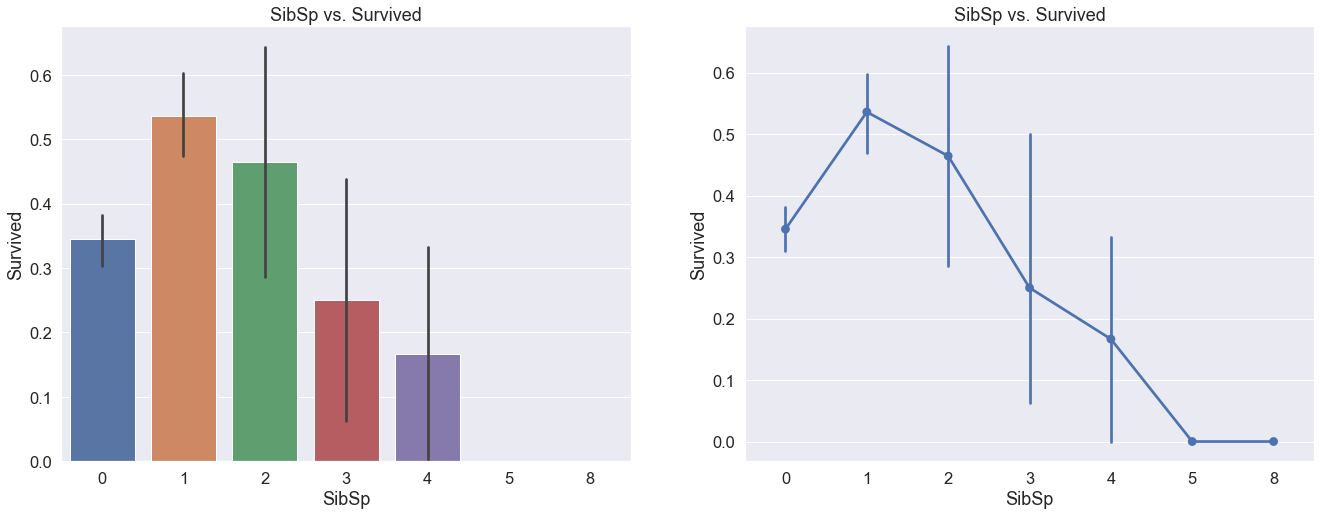

In [29]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs. Survived')

sns.pointplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs. Survived')
plt.show()

In [30]:
pd.crosstab(data['SibSp'], data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


bar plot과 factor plot은 혼자 탑승한 승객의 경우 34.5%의 생존률을 가진다는 것을 보여줍니다. SibSp의 수가 증가할수록 그래프는 급격하게 감소합니다. 즉, 가족이 함께 승선할 경우 자신보다 가족을 먼저 구조하려 할 것입니다. 놀랍게도 5-8명의 가족의 생존률은 **0%**입니다. Pclass 때문일까요?  

이유는 Pclass 때문임을 crosstab을 통해 확인할 수 있습니다. SibSp가 4 이상인 사람들은 전부 3등석입니다.

##### Parch (연속형 변수)

In [31]:
pd.crosstab(data['Parch'], data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


위 cross table 또한 큰 가족들은 3등석임을 보여줍니다.

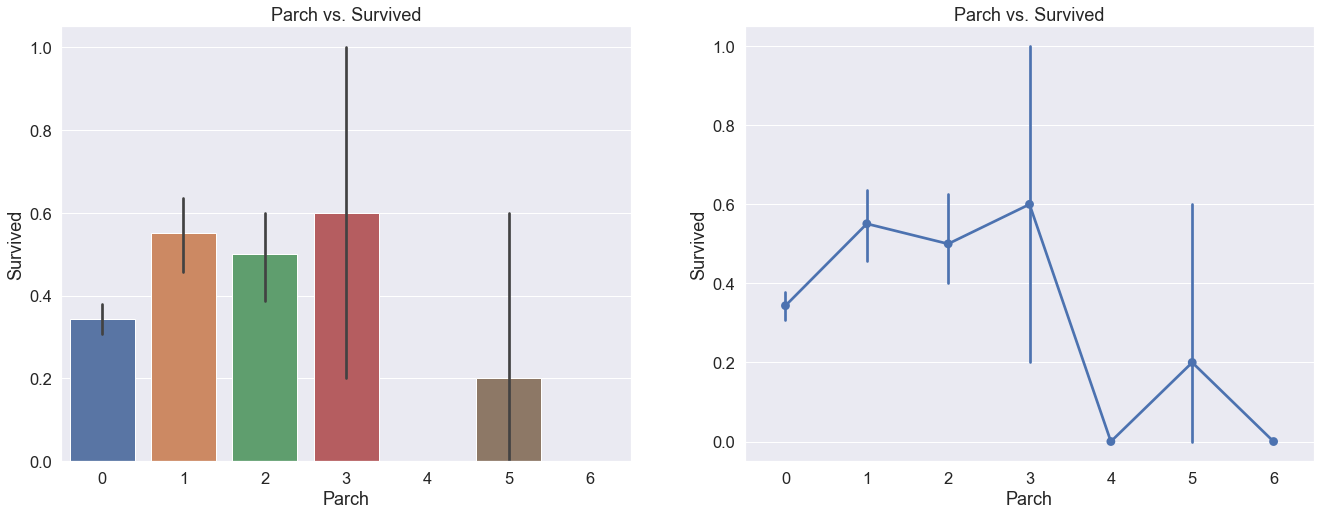

In [32]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs. Survived')

sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs. Survived')
plt.show()

결과가 매우 비슷합니다. 부모와 함께 탑승한 승객은 생존 가능성이 더 높습니다. 그러나 그 수가 증가할수록 생존률은 감소합니다.  

1~3명의 가족과 함께 한 사람의 생존 가능성이 높습니다. 혼자 탄 사람은 역시 치명적인 것으로 판명되며, 가족 수가 4인 이상인 경우에도 마찬가지로 생존 가능성이 감소합니다.

##### Fare (연속형 변수)

In [33]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


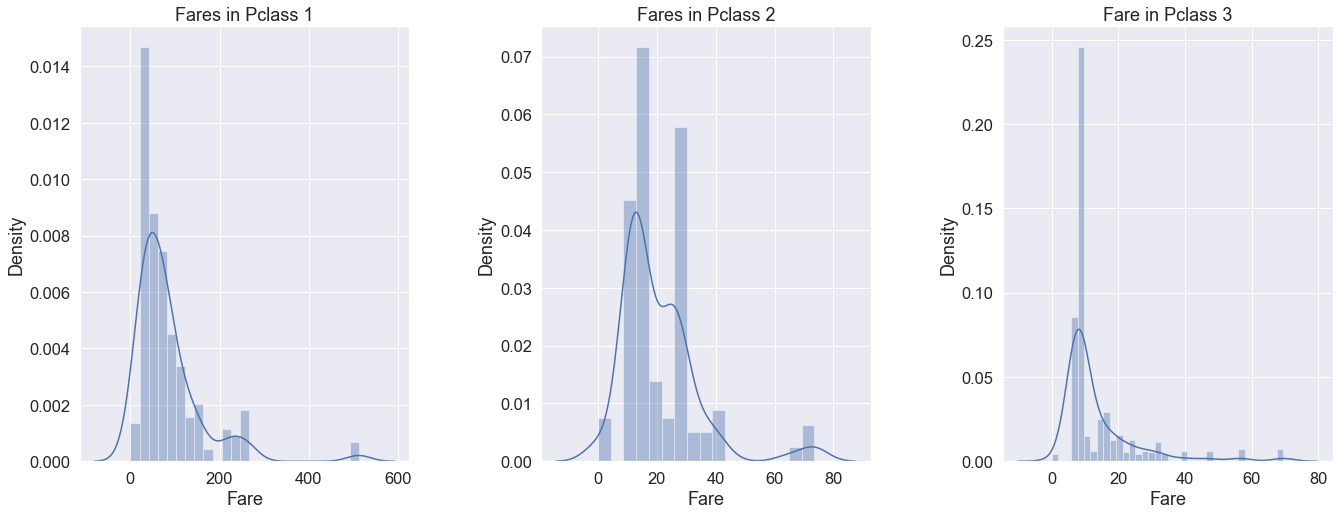

In [34]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data.loc[data['Pclass']==1, 'Fare'], ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data.loc[data['Pclass']==2, 'Fare'], ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data.loc[data['Pclass']==3, 'Fare'], ax=ax[2])
ax[2].set_title('Fare in Pclass 3')
plt.subplots_adjust(wspace=0.4)
plt.show()

1등석 승객들의 운임의 분포가 가장 넓고, Pclass가 낮아질수록 분포가 좁아집니다. 운임 또한 연속형 변수이기 때문에 binning을 사용하여 이산값으로 변환할 수 있습니다.

##### 모든 feature들에 대한 관찰
**Sex:**  
남성과 비교하여 여성의 생존 가능성이 높습니다.  

**Pclass:**  
1등석 승객은 생존 가능성을 높여주는 경향이 있습니다. 여성의 경우 1등석 승객의 생존 가능성은 1에 가깝고 2등석 또한 매우 높습니다.  

**Age:**  
5-10세 이하의 어린이들은 높은 생존 가능성을 가지고 있으며, 15-30세 사이의 집단은 많이 죽었습니다.  

**Embarked:**  
굉장히 흥미로운 Feature입니다. S 항구을 1등석 승객의 대부분이 이용했음에도 불구하고, C 항구의 생존 가능성이 더 높습니다. Q 항구의 탑승객들은 모두 3등석입니다.  

**Parch+SibSp:**  
1\~2명의 형제자매, 배우자 혹은 1\~3명의 부모와 함께 탑승했을 때가 혼자 탑승했거나 많은 가족들과 탑승했을 때보다 생존 가능성이 큽니다.

#### 1-2. feature 간 상관 분석

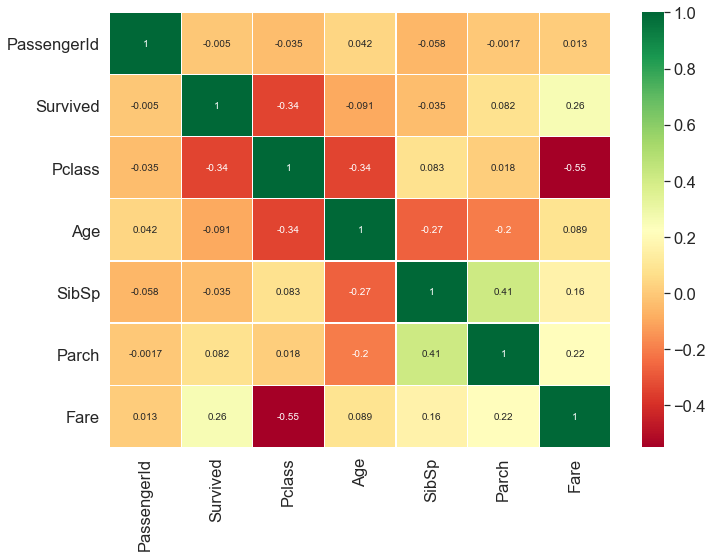

In [35]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

가장 먼저 주의해야 할 것은 알파벳이나 문자열 간에는 상관 관계가 없다는 것이 분명하기 때문에 numeric feature만 비교된다는 것입니다. 위 그래프를 이해하기 전에 상관 관계에 대해 정확히 알아봅시다.  

**양의 상관관계:** feature A가 증가할 때 feature B도 증가한다면, A와 B는 서로 양의 상관관계입니다. 값이 1이라면 완벽한 양의 상관관계를 의미합니다.  
**음의 상관관계:** feature A가 증가할 때 feature B는 감소한다면, A와 B는 서로 음이 상관관계입니다. 값이 -1이라면 완벽한 음의 상관관계를 의미합니다.  

두 feature가 강한 상관관계를 가지고, 하나가 증가할 때 다른 하나도 증가한다고 가정해봅시다. 이때 두 feature는 매우 유사한 정보를 가지고 있고 정보의 분산이 거의 없습니다. 둘 다 거의 비슷한 정보를 포함하고 있는 이러한 현상은 **다중공선성(MultyColinearity)**이라고 알려져 있습니다.  

모델을 만들거나 학습시킬 때, 학습 시간 단축이나 성능을 높이기 위해 중복된 feature들을 제거해야 합니다. 

이제 위의 heatmap을 보면, 각각의 feature들이 별로 상관이 없다고 볼 수 있습니다. 가장 강한 상관관계인 SibSp와 Parch의 상관관계가 0.41이므로 우리는 모든 feature를 사용할 수 있습니다.

### Part 2. Feature Engineering과 Data Cleansing
feature engineering이 무엇일까요?  

항상 모든 feature들이 중요한 것은 아닙니다. 제거해야 할 불필요한 feature들도 많이 있을 것입니다. 또한 다른 feature들로부터 추출한 정보를 새로운 feature로 추가할 수도 있습니다.  

예시로, 우리는 Name feature를 사용하여 Initial feature를 얻었습니다. 새롭게 얻을 feature나 제거할 feature가 있는지 살펴봅시다. 또한 관련 feature를 예측 모델링에 적합한 형태로 변환해봅시다.

#### 2-1. 새로운 feature 추가

##### Age_band

**Age feature의 문제점:**  
앞서 언급했던 것처럼 Age는 연속형 변수입니다. 그러나 연속형 변수는 머신러닝 모델에 적합하지 않습니다.  

성별에 따라 사람을 분류하려 한다면, 우리는 쉽게 여성과 남성으로 나눌 수 있습니다. 그러나 Age의 경우, 30명의 사람이 있다면 값 또한 30개일 수 있으므로 문제가 됩니다.  

binning이나 표준화를 통해 연속형 변수를 범주형 변수로 바꿀 필요가 있습니다. 여기서는 binning을 사용하여 다양한 연령을 하나의 bin으로 묶을 것입니다.  


가장 높은 연령이 80세이므로, 0-80세를 5개의 bin으로 나눠봅시다. 따라서 bin의 크기는 각각 16입니다.

In [36]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16)&(data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32)&(data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48)&(data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


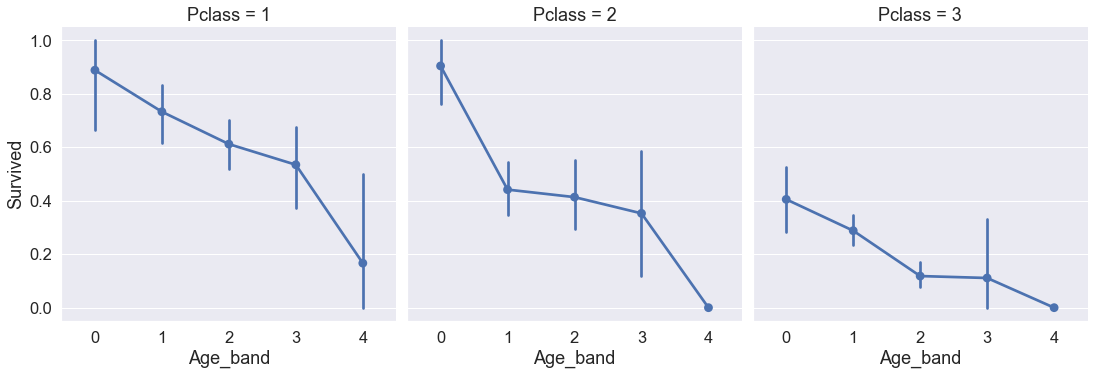

In [38]:
sns.factorplot('Age_band', 'Survived', col='Pclass', data=data)
plt.show()

Pclass와 관계없이 나이가 증가함에 따라 생존률은 감소하는 것을 확인할 수 있습니다.

##### Family_Size와 Alone
Family_size와 Alone이라는 새로운 feature를 만들 수 분석해봅시다. 이 feature는 Parch와 SibSp의 합입니다. 결합된 데이터를 통해 생존률이 승객의 가족 규모와 관련이 있는지 확인할 수 있습니다. Alone은 승객이 혼자인지 아닌지를 나타냅니다.

In [39]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data['Family_Size'] == 0, 'Alone'] = 1

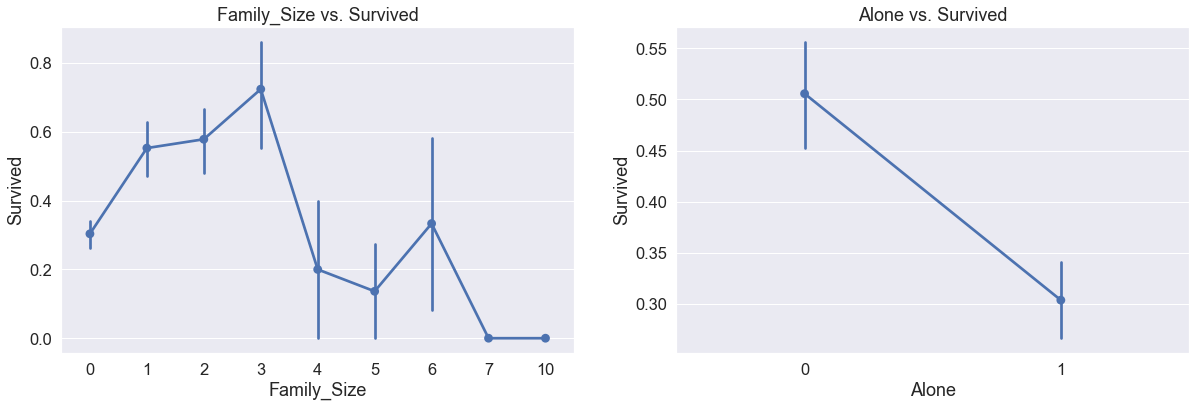

In [40]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.pointplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs. Survived')

sns.pointplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs. Survived')
plt.show()

Family_Size = 0은 혼자 탑승했음을 의미합니다. Alone = 1이거나 Family_Size = 0인 경우 생존률은 굉장히 낮습니다. 가족 규모가 4 이상인 경우에도 가능성이 낮아집니다.  

이는 모델에 중요한 feature인 것으로 보입니다.

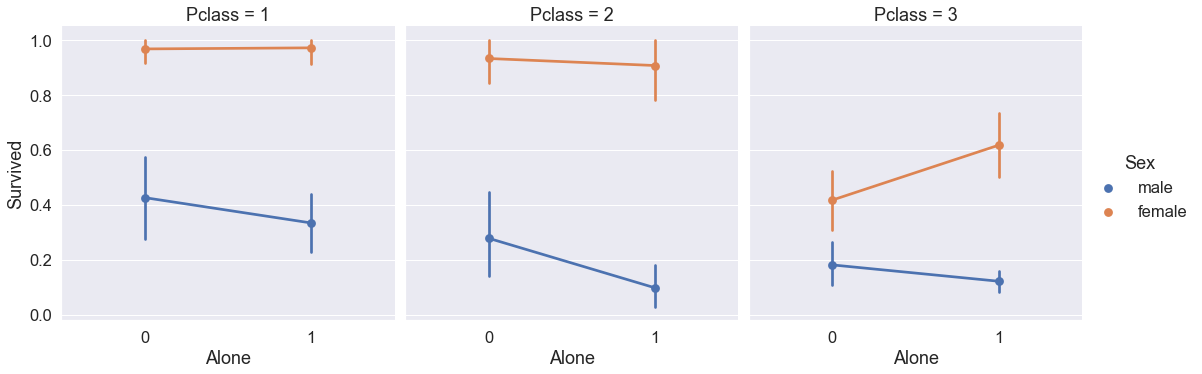

In [41]:
sns.factorplot('Alone', 'Survived', col='Pclass', hue='Sex', data=data)
plt.show()

##### Fare_Range
Fare 또한 연속형 변수이기 대문에 순서형 변수로 바꿔야 합니다. 여기서는 pandas 라이브러리의 qcut을 사용하겠습니다.  

qcut은 우리 설정한 bin의 수에 따라 값을 분할하거나 정렬합니다.

In [42]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 언급한 대로, Fare_Range가 증가할수록 생존 가능성도 높아집니다.  

현재 상태로는 Fare_Range 값을 사용할 수 없으므로 Age_Band를 만들 때 했던 작업이 필요합니다.

In [43]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91)&(data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454)&(data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[data['Fare'] > 31, 'Fare_cat'] = 3

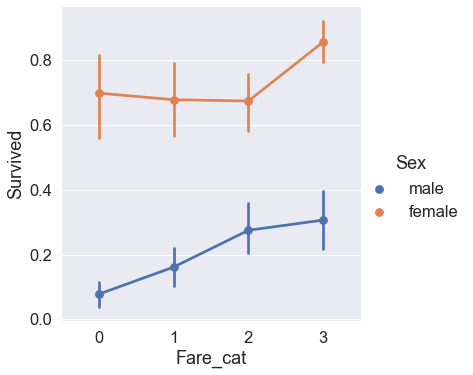

In [44]:
sns.factorplot('Fare_cat', 'Survived', hue='Sex', data=data)
plt.show()

Fare_cat이 증가할수록 생존 가능성도 높아집니다. 이 feature 또한 Sex와 함께 모델링에 중요한 feature가 될 수 있습니다.

##### String을 Numeric으로 변환
머신러닝 모델에는 문자열을 사용할 수 없으므로 Sex, Embarked 등의 feature들을 숫자형으로 바꿔야 합니다.

In [45]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

#### 2-2. 불필요한 feature 제거
Name, Age, Ticket, Fare, Cabin, Fare_Range, PassengerId

In [46]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

In [47]:
data.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1


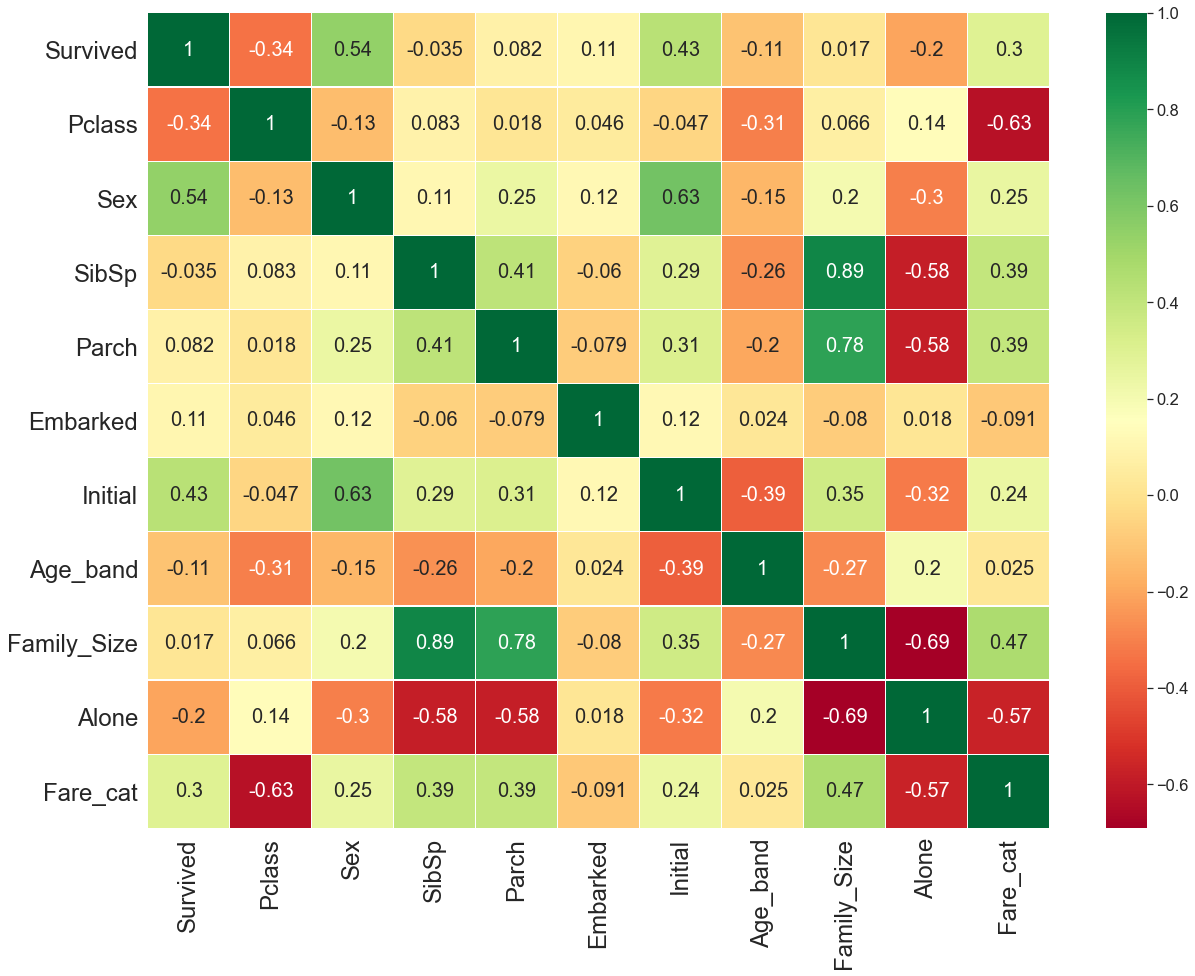

In [48]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidth=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

SibSp와 Parch는 Family_Size와 양의 상관관계를 가지고, Alone은 Family_Size와 음의 상관관계를 가집니다.

### Part 3. 예측 모델링

#### 3-1. 기본적인 알고리즘
EDA part에서 몇 가지 insight를 얻었습니다. 그러나 이것만으로는 승객이 살아남을지 죽을지 정확하게 예측할 수 없습니다. 따라서 우리는 분류 알고리즘들을 사용하여 승객의 생존 여부를 예측해볼 것입니다. 모델링에 사용할 알고리즘은 다음과 같습니다.  

1. Logistic Regression (로지스틱 회귀분석)
2. Support Vector Machine(Linear and radial) (서포트 벡터 머신)
3. Random Forest (랜덤 포레스트)
4. K-Nearest Neighbours (KNN)
5. Naive Bayes (나이브 베이즈)
6. Decision Tree (의사결정 나무)

In [49]:
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn import svm                              # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.neighbors import KNeighborsClassifier   # KNN
from sklearn.naive_bayes import GaussianNB           # Naive Bayes
from sklearn.tree import DecisionTreeClassifier      # Decision Tree
from sklearn.model_selection import train_test_split # data split
from sklearn import metrics                          # accuracy measure
from sklearn.metrics import confusion_matrix         # confusion matrix

In [50]:
train, test = train_test_split(data, test_size=0.3, random_state=123, stratify=data['Survived'])
train_x = train[train.columns[1:]]
train_y = train[train.columns[0]]
test_x = test[test.columns[1:]]
test_y = test[test.columns[0]]
X = data[data.columns[1:]]
Y = data['Survived']

##### Radial Support Vector Machine (rbf-SVM)

In [51]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_x, train_y)
prediction1 = model.predict(test_x)
print('The accuracy of the rbm SVM is', metrics.accuracy_score(prediction1, test_y))

The accuracy of the rbm SVM is 0.8208955223880597


##### Linear Support Vector Machine (linear-SVM)

In [52]:
model = svm.SVC(kernel='linear', C=1, gamma=0.1)
model.fit(train_x, train_y)
prediction2 = model.predict(test_x)
print('The accuracy of the linear SVM is', metrics.accuracy_score(prediction2, test_y))

The accuracy of the linear SVM is 0.7611940298507462


##### Logistic Regression

In [53]:
model = LogisticRegression()
model.fit(train_x, train_y)
prediction3 = model.predict(test_x)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_y))

The accuracy of the Logistic Regression is 0.8134328358208955


##### Decision Tree

In [54]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
prediction4 = model.predict(test_x)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_y))

The accuracy of the Decision Tree is 0.7947761194029851


##### K-Nearest Neighbors (KNN)

In [55]:
model = KNeighborsClassifier()
model.fit(train_x, train_y)
prediction5 = model.predict(test_x)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_y))

The accuracy of the KNN is 0.8246268656716418


KNN 모델의 경우 n_neighbors의 값에 따라 정확도가 달라집니다. 기본값은 5입니다. 다양한 n_neighbors의 값에 따른 정확도를 확인해봅시다.

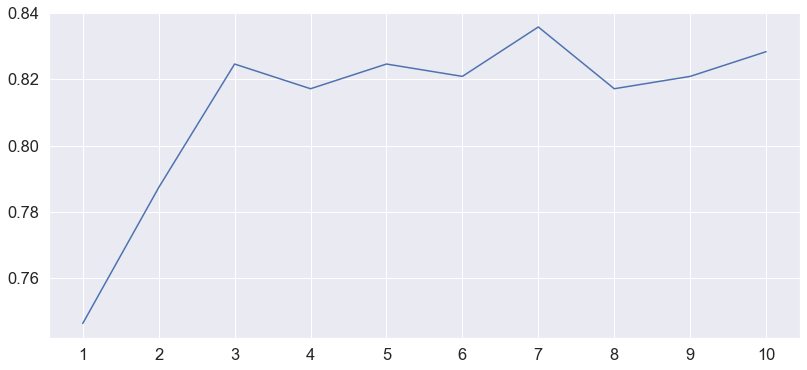

Accuracies for different values of n are:
 [0.74626866 0.78731343 0.82462687 0.81716418 0.82462687 0.82089552
 0.8358209  0.81716418 0.82089552 0.82835821] 
with the max value as 0.835820895522388


In [56]:
a_index = list(range(1, 11))
a = pd.Series()
x = list(range(1, 11))
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    a = a.append(pd.Series(metrics.accuracy_score(pred, test_y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:\n', a.values, '\nwith the max value as', a.values.max())

##### Gaussian Naive Bayes

In [57]:
model = GaussianNB()
model.fit(train_x, train_y)
prediction6 = model.predict(test_x)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(prediction6, test_y))

The accuracy of the Naive Bayes is 0.7985074626865671


##### Random Forest

In [58]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_x, train_y)
prediction7 = model.predict(test_x)
print('The accuracy of the Random Forest is', metrics.accuracy_score(prediction7, test_y))

The accuracy of the Random Forest is 0.8097014925373134


모델의 정확도만이 분류기의 견고함(robustness)을 판단하는 요소는 아닙니다. 분류기의 정확도가 90%를 기록했다고 가정해봅시다. 이것은 매우 좋은 분류기처럼 보이지만, 새로 입력되는 모든 테스트 셋에 대해 90%가 된다고 할 수 있을까요? 아닙니다. 분류기가 스스로를 학습시키는 데 사용할 모든 인스턴스를 결정할 수 없기 때문입니다. 트레이닝 셋과 테스트 셋이 변하면 정확도도 바뀔 것입니다. 이것은 **모델 분산(model variance)**로 알려져 있습니다.  

이를 해결하고 일반화된 모델을 얻기 위해 **교차 검증(Cross Validation)**을 사용합니다.

#### 3-2. 교차 검증
class 1 인스턴스는 많지만 다른 class 인스턴스는 적을 수 있는 것처럼 데이터는 불균형한 경우가 많습니다. 따라서 우리는 데이터셋의 각각 모든 인스턴스에 대해 알고리즘을 학습하고 테스트해야 합니다. 그럼 데이터셋 전반에 대한 정확도의 평균을 얻을 수 있습니다.  

1. K-Fold Cross Validation(K겹 교차 검증)은 먼저 데이터 셋을 K개의 하위 집합으로 나눕니다.  
2. K=5라고 가정하면, 한 개의 집합은 테스트를 위해 남겨두고, 나머지 네 개의 집합은 알고리즘을 학습시킵니다.  
3. 테스트 집합을 바꾸고 나머지 집합들로 알고리즘을 훈련함으로써 이 과정을 계속합니다. 이것을 K겹 교차 검증이라고 합니다.  
4. 알고리즘은 일부 트레이닝 데이터에 대한 데이터셋에 대해 과소적합될 수 있으며, 대로는 과대적합될 수 있습니다. 따라서 교차 검증을 통해 일반화된 모델을 만들 수 있습니다.

In [59]:
from sklearn.model_selection import KFold              # K-fold Cross Validation
from sklearn.model_selection import cross_val_score    # score evaluation
from sklearn.model_selection import cross_val_predict  # predcition

In [60]:
kfold = KFold(n_splits=10, random_state=123)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(),
          KNeighborsClassifier(n_neighbors=7), DecisionTreeClassifier(), GaussianNB(),
          RandomForestClassifier(n_estimators=100)]

In [61]:
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.793583,0.033724
Decision Tree,0.803633,0.028628
Naive Bayes,0.801386,0.028999
Random Forest,0.812622,0.033735


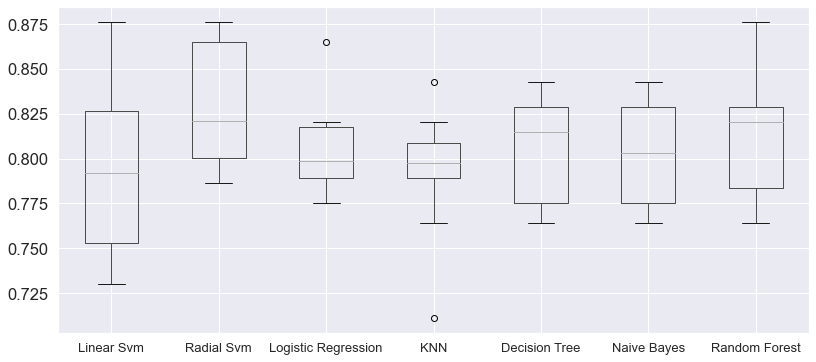

In [62]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot()
plt.xticks(size=13)
plt.show()

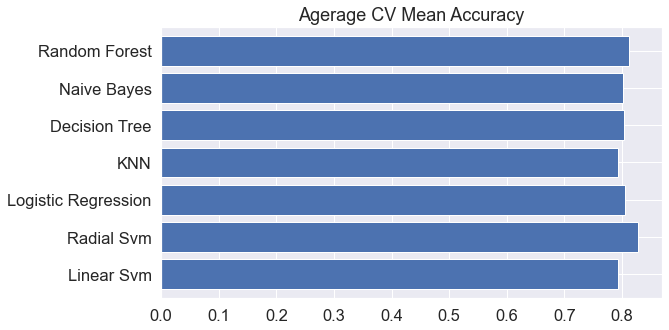

In [63]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Agerage CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

분류 정확도는 불균형에 의해 오해가 생길 수 있습니다. 모델이 어디서 잘못되었는지, 또는 모델이 어떤 class를 잘못 예측했는지 보여주는 혼동 행렬(Confusion Matrix)의 도움으로 요약된 결과를 얻을 수 있습니다.

##### 혼동 행렬
분류기에 의해 만들어진 올바른 분류와 잘못된 분류의 수를 알려줍니다.

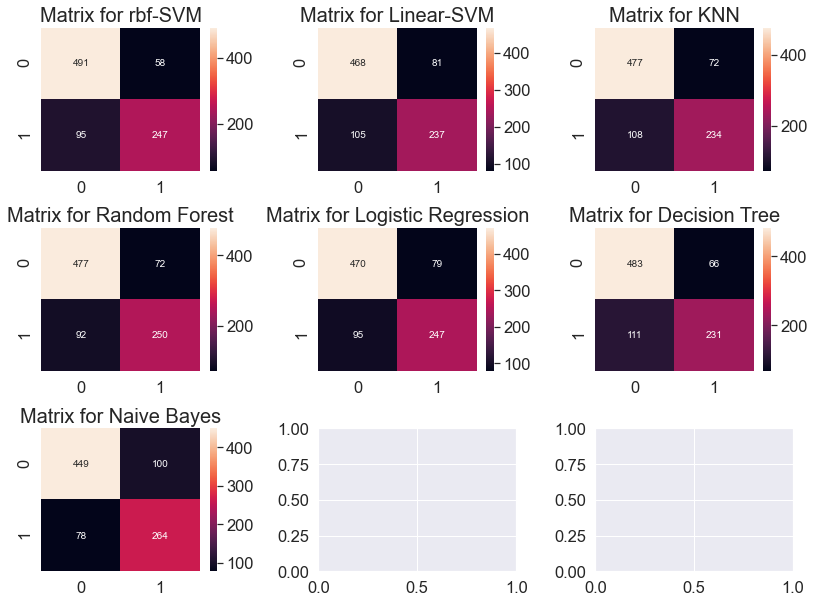

In [64]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM', size=20)

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM', size=20)

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=7), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN', size=20)

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random Forest', size=20)

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression', size=20)

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree', size=20)

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes', size=20)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

왼쪽 대각선은 각 class에 대해 옳게 예측한 수를 의미하고, 오른쪽 대각선은 잘못 예측한 수를 의미합니다.  

rbf-SVM에 대한 그래프를 살펴봅시다.
1) 옳게 예측한 수는 **491(사망) + 247(생존)**이며, 평균 CV 정확도는 (491+247)/891 = **82.8%**입니다.  
2) 58명의 사망자를 생존자로, 95명의 생존자를 사망자로 잘못 분류하였습니다. 사망자를 생존자로 예측함으로써 더 큰 실수를 만들었습니다.  

모든 행렬들을 보면, rbf-SVM이 사망자를 올바르게 예측할 가능성이 가장 높고, Naive Bayes가 생존자를 올바르게 예측할 가능성이 가장 높다고 말할 수 있습니다.

##### 하이퍼 파라미터 튜닝
머신러닝 모델은 블랙박스와 같습니다. 블랙박스에는 기본 파라미터 값들이 있는데, 우리는 더 나은 모델을 얻기 위해 고치거나 바꿀 수 있습니다. SVM 모델의 C, gamma와 같은 파라미터들을 하이퍼 파라미터(Hyper Parameter)라고 하며, 알고리즘의 학습 속도를 바꾸고 더 나은 모델을 얻기 위해 이 하이퍼 파라미터를 조절할 수 있습니다. 이것을 하이퍼 파라미터 튜닝(Hyper Parameter Tuning)이라고 합니다.

**SVM**

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
C = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   19.5s finished


**Random Forest**

In [67]:
n_estimators = range(100, 1100, 100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=123), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.4s finished


0.82045069361622
RandomForestClassifier(n_estimators=300, random_state=123)


rbf-SVM의 최고 점수는 **C=0.4, gamma=0.3에서 82.83%**이고, Random Forest는 **n_estimators=300에서 82.05%**입니다.

#### 3-3. 앙상블
앙상블은 모델의 정확도를 높이기에 아주 좋은 방법입니다. 간단히 말해서, 다양한 모델들을 결합하여 하나의 강력한 모델을 만드는 것입니다.  

핸드폰을 사고 싶어서 많은 사람들에게 물어본다고 가정해봅시다. 우리는 다양한 파라미터들을 분석한 뒤 판단을 내릴 수 있습니다. 이것이 모델의 안정성을 높이는 앙상블(Ensemble)입니다.  

앙상블의 종류는 다음과 같습니다.  
1) Voting Classigier (보팅)  
2) Bagging (배깅)  
3) Boosting (부스팅)

##### Voting Classifier
여러 단순 머신러닝 모델들의 예측 결과들을 결합하는 가장 간단한 방법입니다. 모든 하위 모델들에 대한 결과에 기반하여 평균 예측 결과를 보여줍니다. 하위 모델(베이스 모델)들은 모두 다른 종류입니다.

In [68]:
from sklearn.ensemble import VotingClassifier

In [69]:
ensemble_lin_rbf = VotingClassifier(estimators=[
    ('KNN', KNeighborsClassifier(n_neighbors=10)),
    ('RBF', svm.SVC(kernel='rbf', probability=True, C=0.5, gamma=0.1)),
    ('RFor', RandomForestClassifier(n_estimators=500, random_state=123)),
    ('LR', LogisticRegression(C=0.05)),
    ('DT', DecisionTreeClassifier(random_state=123)),
    ('NB', GaussianNB()),
    ('svm', svm.SVC(kernel='linear', probability=True))
], voting='soft').fit(train_x, train_y)

print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_x, test_y))

The accuracy for ensembled model is: 0.8283582089552238


In [70]:
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The cross validated score is 0.8237952559300874


##### Bagging
Bagging은 데이터셋의 작은 범위에 유사한 분류기를 적용하고, 모든 예측 결과의 평균을 가져옵니다. 이러한 평균화로 인해 분산이 감소합니다. Voting Classifier와는 다르게 Bagging의 경우 유사한 분류기들을 사용합니다.

**Bagged KNN**  
Bagging은 분산이 큰 모델에 적합합니다. 의사결정 나무나 랜덤 포레스트를 예로 들 수 있습니다. 우리는 n_neighbor 값이 작은 KNN 모델을 사용할 수 있습니다.

In [71]:
from sklearn.ensemble import BaggingClassifier

In [72]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=123, n_estimators=700)
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_y))

The accuracy for bagged Decision Tree is: 0.8283582089552238


In [73]:
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The cross validated score for bagged Decision Tree is: 0.8171660424469414


##### Boosting
Boosting은 분류기의 순차적인 학습을 사용하는 앙상블 기술입니다. 약한 모델로부터 한 단계씩 강화됩니다.  

모델은 먼저 완전한 데이터셋으로 학습됩니다. 이제 모델은 일부 인스터스는 맞고 일부는 틀린 상태입니다. 다음 차례에서, 학습자는 잘못 예측된 인스턴스에 초첨을 두거나 그에 대한 가중치를 부여합니다. 따라서 잘못된 인스턴스를 올바르게 예측하고자 합니다. 이 과정이 반복되고, 정확도가 한계에 달할 때까지 새로운 분류기가 모델에 추가됩니다.

**AdaBoost(Adaptive Boosting, 에이다부스트)**  
이 경우 약한 학습자나 estimator는 의사결정 나무입니다.그러나 기본 estimator를 원하는 알고리즘으로 바꿀 수 있습니다.

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


**Stochastic Gradient Boosting(확률적 그래디언트 부스팅)**  
이 부스팅의 약한 학습자 또한 의사결정 나무입니다.

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=123, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


**XGBoost**

In [77]:
import xgboost as xg

In [78]:
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')

[22:23:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [79]:
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


Adaboost의 정확도가 가장 높으므로 하이퍼 파라미터 튜닝을 통해 해당 모델의 정확도를 높여봅시다.

**Hyper-Parameter Tuning for AdaBoost**

In [80]:
n_estimators=list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  9.3min finished


AdaBoost에서 얻은 최대 정확도는 **n_estimators=100, learning_rate=0.1일 때 82.94%**입니다.

##### 최적 모델을 위한 혼동 행렬

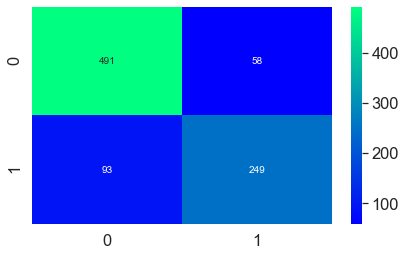

In [81]:
ada = AdaBoostClassifier(n_estimators=100, random_state=123, learning_rate=0.1)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

#### 3-4. 중요한 feature 추출

[22:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


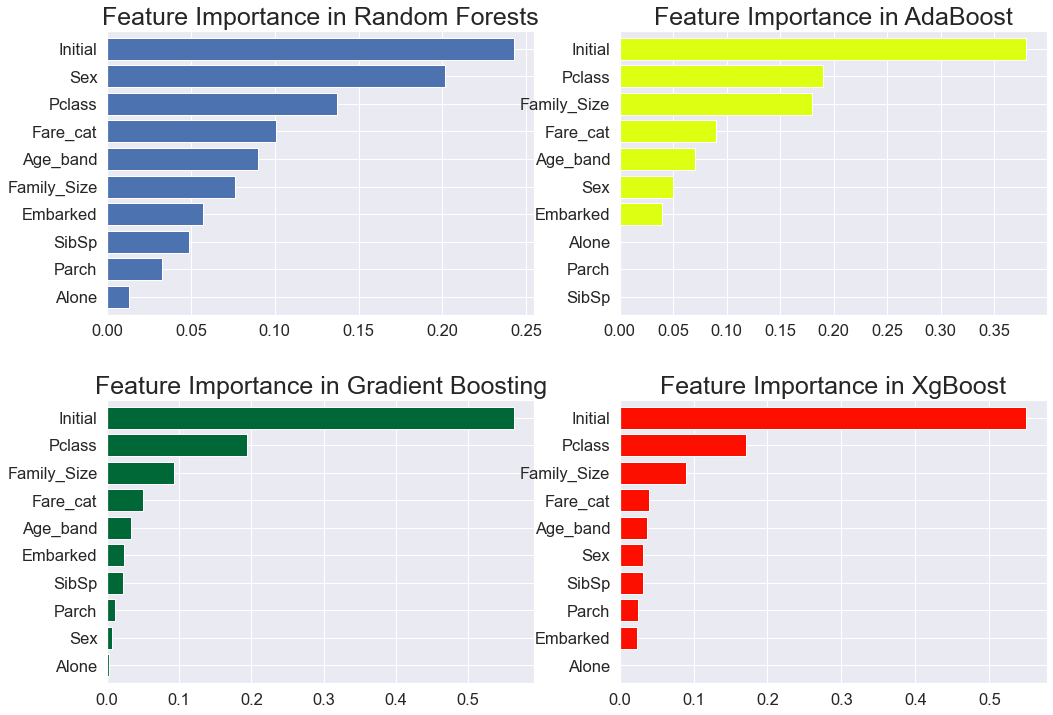

In [82]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))
model = RandomForestClassifier(n_estimators=500, random_state=123)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests', size=25)

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=123)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost', size=25)

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=123)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting', size=25)

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost', size=25)
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

랜덤 포레스트, 에이다 부스트 등 다양한 분류기에서 중요한 feature들을 확인했습니다.  

1. 공통적으로 중요한 feature는 Initial, Pclass, Family_Size입니다.  
2. Sex feature은 생각보다 중요하지 않아 보입니다. 이는 앞에서 Pclass와 함께 보았을 때 매우 좋은 차별화 요소를 주었다는 것과는 차이가 보여 충격적입니다. Sex feature는 랜덤 포레스트에서만 중요합니다.  
그러나 Initial feature는 대부분의 분류기에서 가장 중요도가 높은 것을 볼 수 있습니다. 우리는 이미 Sex와 Initial의 양이 상관관계를 확인했기 때문에 둘 다 성별을 의미한다고 할 수 있습니다.  
3. 마찬가지로 Pclass와 Fare_cat은 승객의 상태, Family_Size, Alone, Parch, SibSp를 나타냅니다.